# Projeto de Bloco: Inteligência Artificial e Machine Learning [25E2_5]
## Projeto de Classificação com KNN: Heart Disease Dataset

**Autor:** Jorge Santos do Nascimento

**Descrição:**
Este notebook executa o ciclo completo para classificação do risco de doença cardíaca utilizando o dataset `heart.csv`. Inclui análise de dados, processamento, modelagem com KNN, avaliação e análise do parâmetro K.


## 1. Carregamento de Dados e Compreensão Inicial

In [5]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Identificação de Features e Target
- **Features (variáveis preditoras):** Todas exceto 'HeartDisease'.
- **Target (variável-alvo):** 'HeartDisease' (0 = não, 1 = sim).

In [7]:
features = df.drop('HeartDisease', axis=1)
target = df['HeartDisease']

## 2. Transformação dos Dados
- Categóricas: OneHotEncoding
- Numéricas: Padronização (StandardScaler)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Features categóricas e numéricas
categorical = features.select_dtypes(include='object').columns.tolist()
numerical = features.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Transformador
transformer = ColumnTransformer([
    ('cat', OneHotEncoder(drop='first'), categorical),
    ('num', StandardScaler(), numerical)
])

X_transformed = transformer.fit_transform(features)
X_transformed.shape

(918, 15)

## 3. Divisão dos Dados (80% treino, 20% validação)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_transformed, target, test_size=0.2, random_state=42, stratify=target
)
X_train.shape, X_val.shape

((734, 15), (184, 15))

## 4. Modelagem com K-Nearest Neighbors (KNN)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# Modelo KNN padrão (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f'Acurácia (k=5): {acc:.4f}')

Acurácia (k=5): 0.8859


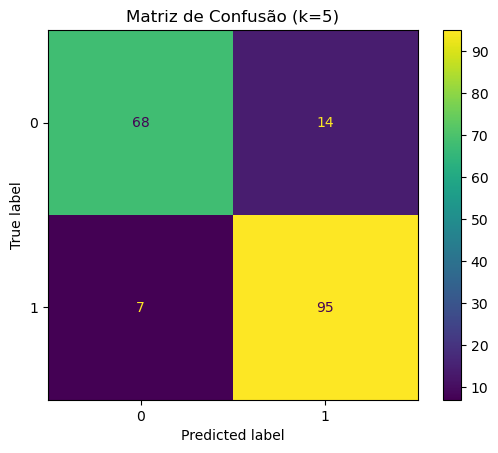

In [11]:
# Matriz de confusão
ConfusionMatrixDisplay.from_estimator(knn, X_val, y_val)
import matplotlib.pyplot as plt
plt.title('Matriz de Confusão (k=5)')
plt.show()

## 5. Análise do Parâmetro K
- Vamos variar K de 1 a 20 e analisar o impacto na acurácia.

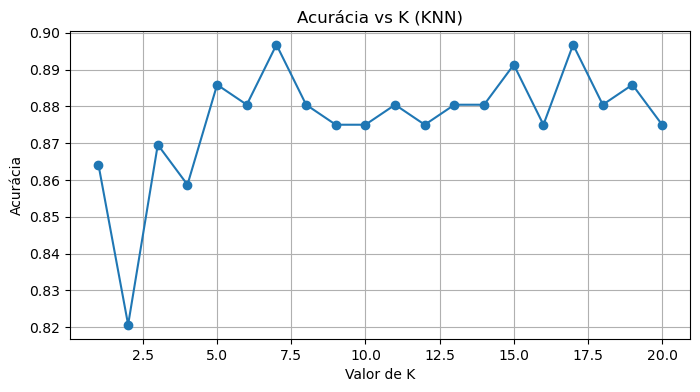

In [12]:
accuracies = []
ks = range(1, 21)
for k in ks:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    y_pred_k = knn_k.predict(X_val)
    acc_k = accuracy_score(y_val, y_pred_k)
    accuracies.append(acc_k)

plt.figure(figsize=(8,4))
plt.plot(ks, accuracies, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')
plt.title('Acurácia vs K (KNN)')
plt.grid()
plt.show()

### Discussão:
Valores muito baixos de K podem levar a overfitting, enquanto valores muito altos podem causar underfitting. O gráfico acima ajuda a escolher o K ideal, normalmente entre 3 e 8 para este tipo de base.

## 6. Conclusão e Observações

- O modelo KNN apresentou boa acurácia para a tarefa de classificação de risco de doença cardíaca.
- O ajuste do parâmetro K é fundamental para o desempenho.
- Recomendam-se futuras análises com validação cruzada, outros algoritmos (Random Forest, SVM) e ajuste de hiperparâmetros.
- O pré-processamento (OneHotEncoder + StandardScaler) foi essencial devido à natureza mista dos dados.
- Para submissão, exporte este notebook em PDF conforme solicitado.

> **Para exportar:** No Jupyter/PyCharm: File > Export as > PDF, ou rode no terminal: `jupyter nbconvert --to pdf NOME_DO_NOTEBOOK.ipynb`.